In [4]:
# Import pandas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
pd.set_option('display.max_columns', None)

In [1]:
from src import corr

c:\Users\nick_\anaconda3\envs\foozball\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
print(dir(src))

['ColumnTransformer', 'ConfusionMatrixDisplay', 'DecisionTreeClassifier', 'FunctionTransformer', 'GridSearchCV', 'ImbPipeline', 'LinearRegression', 'LogisticRegression', 'MinMaxScaler', 'OneHotEncoder', 'Pipeline', 'RandomForestClassifier', 'SMOTE', 'SimpleImputer', 'StandardScaler', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'accuracy_score', 'classification_report', 'eval_classification', 'f1_score', 'make_imb_pipeline', 'make_pipeline', 'np', 'pd', 'plt', 'precision_score', 'recall_score', 'roc_auc_score', 'set_config', 'shap', 'train_test_split', 'xgb']


In [5]:
print('corr' in dir(src))

False


In [5]:
# Import dataset

df = pd.read_csv('merged_clean.csv')

In [7]:
df.head()

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles
0,2009.0,PHI,ACT,70.0,200.0,00-0000108,12.0,WC,1997.0,35.0,David Akers,K,00-0000108_2009_David_Akers_K,18.0,18.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010.0,PHI,ACT,70.0,200.0,00-0000108,13.0,WC,1997.0,36.0,David Akers,K,00-0000108_2010_David_Akers_K,18.0,18.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hamstring,Active,Hamstring,Full Participation in Practice,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2011.0,SF,ACT,70.0,200.0,00-0000108,14.0,CON,1997.0,37.0,David Akers,K,00-0000108_2011_David_Akers_K,20.0,20.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047313,1.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2012.0,SF,ACT,70.0,200.0,00-0000108,15.0,SB,1997.0,38.0,David Akers,K,00-0000108_2012_David_Akers_K,21.0,21.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hip,Probable,Hip,Full Participation in Practice,0.0,0.0,5.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013.0,DET,ACT,70.0,200.0,00-0000108,16.0,REG,1997.0,39.0,David Akers,K,00-0000108_2013_David_Akers_K,17.0,17.0,0.0,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df = df.sort_values(['player_id_x', 'season_x'], ascending=False)
df.head(25)

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles
13498,2024.0,SEA,CUT,78.0,240.0,00-0039952,0.0,REG,2024.0,25.0,Devon Garrison,TE,00-0039952_2024_Devon_Garrison_TE,0.0,18.0,18.0,1999.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13497,2024.0,GB,DEV,72.0,205.0,00-0039945,0.0,WC,2024.0,26.0,Alex Hale,K,00-0039945_2024_Alex_Hale_K,0.0,19.0,19.0,1998.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13496,2024.0,NO,CUT,76.0,260.0,00-0039942,0.0,REG,2024.0,23.0,Mason Fairchild,TE,00-0039942_2024_Mason_Fairchild_TE,0.0,18.0,18.0,2001.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13495,2024.0,KC,CUT,77.0,240.0,00-0039941,0.0,REG,2024.0,25.0,Geor'Quarius Spivey,TE,00-0039941_2024_Geor'Quarius_Spivey_TE,0.0,22.0,22.0,1999.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13494,2024.0,SEA,CUT,67.0,195.0,00-0039940,0.0,REG,2024.0,24.0,Kairee Robinson,RB,00-0039940_2024_Kairee_Robinson_RB,0.0,18.0,18.0,2000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13493,2024.0,DEN,DEV,77.0,251.0,00-0039936,0.0,WC,2024.0,25.0,Thomas Yassmin,TE,00-0039936_2024_Thomas_Yassmin_TE,0.0,19.0,19.0,1999.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13492,2024.0,NYG,DEV,74.0,205.0,00-0039934,0.0,REG,2024.0,24.0,Jude McAtamney,K,00-0039934_2024_Jude_McAtamney_K,1.0,18.0,17.0,2000.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [9]:
df['next_season_missed'] = df.groupby('player_id_x')['missed_games'].shift(1)

In [10]:
df.head()

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed
13498,2024.0,SEA,CUT,78.0,240.0,00-0039952,0.0,REG,2024.0,25.0,Devon Garrison,TE,00-0039952_2024_Devon_Garrison_TE,0.0,18.0,18.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13497,2024.0,GB,DEV,72.0,205.0,00-0039945,0.0,WC,2024.0,26.0,Alex Hale,K,00-0039945_2024_Alex_Hale_K,0.0,19.0,19.0,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13496,2024.0,NO,CUT,76.0,260.0,00-0039942,0.0,REG,2024.0,23.0,Mason Fairchild,TE,00-0039942_2024_Mason_Fairchild_TE,0.0,18.0,18.0,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13495,2024.0,KC,CUT,77.0,240.0,00-0039941,0.0,REG,2024.0,25.0,Geor'Quarius Spivey,TE,00-0039941_2024_Geor'Quarius_Spivey_TE,0.0,22.0,22.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13494,2024.0,SEA,CUT,67.0,195.0,00-0039940,0.0,REG,2024.0,24.0,Kairee Robinson,RB,00-0039940_2024_Kairee_Robinson_RB,0.0,18.0,18.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [7]:
# def corr(df_col):
#   corr_mat = df.select_dtypes(include='number').corr()
#   corr_df = pd.DataFrame()
#   corr_df['raw'] = corr_mat[df_col]
#   corr_df['abs'] = corr_mat[df_col].abs()
#   return corr_df.sort_values(by='abs', ascending=False)


In [13]:

corr(df, 'birth_year').head(25)

,raw,abs
birth_year,1.000000,1.000000
entry_year,0.984166,0.984166
season_x,0.812145,0.812145
age,-0.620192,0.620192
years_exp,-0.594710,0.594710
prob,-0.331209,0.331209
missed_games,0.320797,0.320797
next_season_missed,0.300325,0.300325
active_games,-0.285911,0.285911
max_week,0.211021,0.211021


In [9]:
corr('missed_games').head(25)

,raw,abs
missed_games,1.000000,1.000000
active_games,-0.984947,0.984947
next_season_missed,0.492704,0.492704
ppr_sh,-0.470007,0.470007
targets_summed,-0.431019,0.431019
receptions_summed,-0.428368,0.428368
receiving_yards_after_catch_summed,-0.408710,0.408710
tgt_sh,-0.404002,0.404002
receiving_yards_summed,-0.396445,0.396445
receiving_first_downs_summed,-0.392635,0.392635


<Axes: >

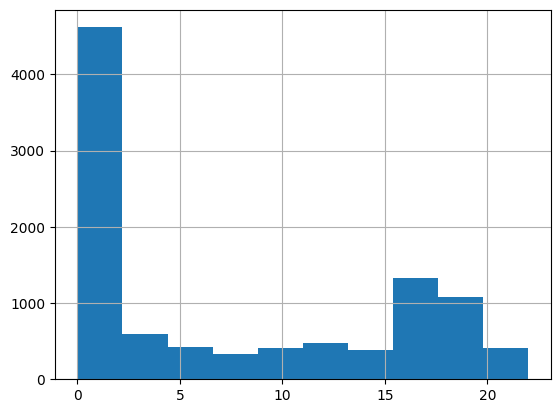

In [10]:
df['next_season_missed'].hist()

In [11]:
df['next_season_missed'].describe()

count    10061.000000
mean         7.532750
std          7.549943
min          0.000000
25%          1.000000
50%          4.000000
75%         17.000000
max         22.000000
Name: next_season_missed, dtype: float64

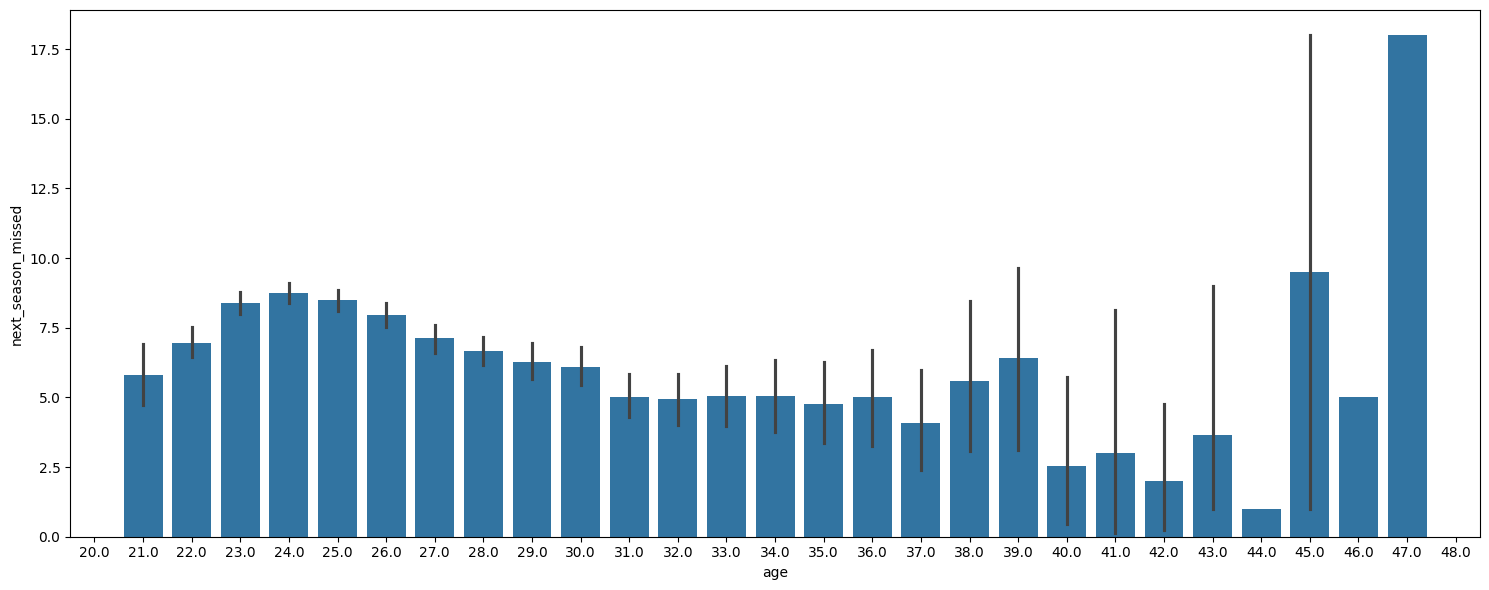

In [12]:
plt.figure(figsize=(15,6))

age_next_missed= sns.barplot(data=df, x='age', y='next_season_missed', estimator = 'mean')
plt.tight_layout()
plt.show()

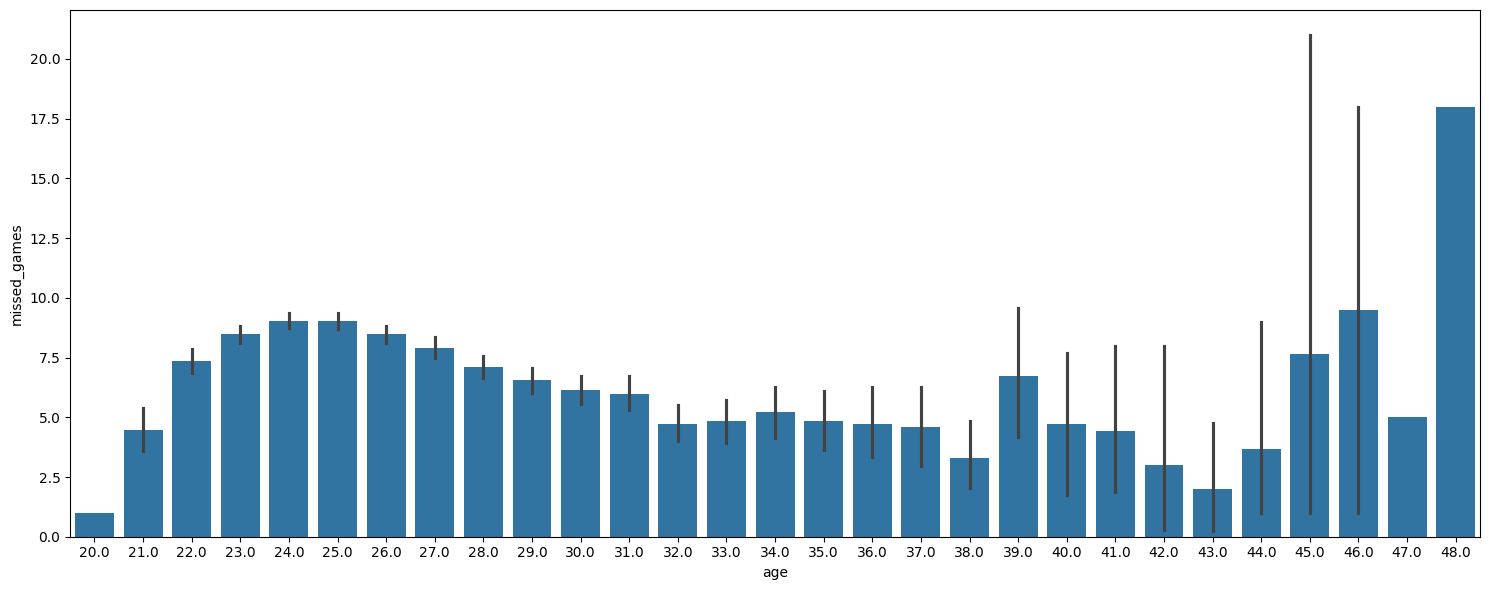

In [13]:
plt.figure(figsize=(15,6))

age_missed= sns.barplot(data=df, x='age', y='missed_games', estimator = 'mean')
plt.tight_layout()
plt.show()

In [14]:
df[df['age'] > 41]

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed
325,2019.0,ATL,CUT,69.0,203.0,00-0020578,17.0,REG,2002.0,44.0,Matt Bryant,K,00-0020578_2019_Matt_Bryant_K,8.0,17.0,9.0,1975.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
324,2018.0,ATL,ACT,69.0,203.0,00-0020578,16.0,REG,2002.0,43.0,Matt Bryant,K,00-0020578_2018_Matt_Bryant_K,16.0,17.0,1.0,1975.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Back,Questionable,Back,Limited Participation in Practice,0.0,0.0,0.0,1.0,1.0,3.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0
323,2017.0,ATL,ACT,69.0,203.0,00-0020578,15.0,DIV,2002.0,42.0,Matt Bryant,K,00-0020578_2017_Matt_Bryant_K,18.0,19.0,1.0,1975.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Back,Active,Back,Limited Participation in Practice,0.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0
310,2021.0,NO,RET,72.0,209.0,00-0020531,20.0,REG,2001.0,42.0,Drew Brees,QB,00-0020531_2021_Drew_Brees_QB,0.0,18.0,18.0,1979.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
197,2022.0,TB,ACT,76.0,225.0,00-0019596,22.0,WC,2000.0,45.0,Tom Brady,QB,00-0019596_2022_Tom_Brady_QB,18.0,19.0,1.0,1977.0,0.001224,0.002898,0.0,0.0,0.0,0.0,0.0,0.0,0.176547,525.0,799.0,5045.0,27.0,10.0,24.0,177.0,4.0,2.0,5387.0,257.0,3.0,29.0,-1.0,1.0,2.0,2.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,Not Injury Related,Active,Not Injury Related,Full Participation in Practice,0.0,0.0,0.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
196,2021.0,TB,ACT,76.0,225.0,00-0019596,21.0,DIV,2000.0,44.0,Tom Brady,QB,00-0019596_2021_Tom_Brady_QB,19.0,20.0,1.0,1977.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.191540,544.0,810.0,5916.0,46.0,13.0,29.0,193.0,4.0,3.0,6400.0,297.0,0.0,29.0,81.0,2.0,1.0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Injury Related,Active,Not Injury Related,Full Participation in Practice,0.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195,2020.0,TB,ACT,76.0,225.0,00-0019596,20.0,SB,2000.0,43.0,Tom Brady,QB,00-0019596_2020_Tom_Brady_QB,20.0,21.0,1.0,1977.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.199167,482.0,748.0,5694.0,50.0,15.0,27.0,180.0,2.0,0.0,6903.0,288.0,0.0,43.0,3.0,4.0,4.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [15]:
## Take a look at rookies only

rookies = df[df['years_exp'] == 0]
rookies.head()

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed
13498,2024.0,SEA,CUT,78.0,240.0,00-0039952,0.0,REG,2024.0,25.0,Devon Garrison,TE,00-0039952_2024_Devon_Garrison_TE,0.0,18.0,18.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13497,2024.0,GB,DEV,72.0,205.0,00-0039945,0.0,WC,2024.0,26.0,Alex Hale,K,00-0039945_2024_Alex_Hale_K,0.0,19.0,19.0,1998.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13496,2024.0,NO,CUT,76.0,260.0,00-0039942,0.0,REG,2024.0,23.0,Mason Fairchild,TE,00-0039942_2024_Mason_Fairchild_TE,0.0,18.0,18.0,2001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13495,2024.0,KC,CUT,77.0,240.0,00-0039941,0.0,REG,2024.0,25.0,Geor'Quarius Spivey,TE,00-0039941_2024_Geor'Quarius_Spivey_TE,0.0,22.0,22.0,1999.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
13494,2024.0,SEA,CUT,67.0,195.0,00-0039940,0.0,REG,2024.0,24.0,Kairee Robinson,RB,00-0039940_2024_Kairee_Robinson_RB,0.0,18.0,18.0,2000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No Inj,Active,No Inj,Full Participation In Practice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [16]:
rookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 13498 to 2416
Data columns (total 77 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   season_x                            2597 non-null   float64
 1   team_x                              2597 non-null   object 
 2   status                              2597 non-null   object 
 3   height                              2597 non-null   float64
 4   weight                              2597 non-null   float64
 5   player_id_x                         2597 non-null   object 
 6   years_exp                           2597 non-null   float64
 7   game_type_x                         2597 non-null   object 
 8   entry_year                          2597 non-null   float64
 9   age                                 2597 non-null   float64
 10  cleaned_name_x                      2597 non-null   object 
 11  std_pos_x                           259

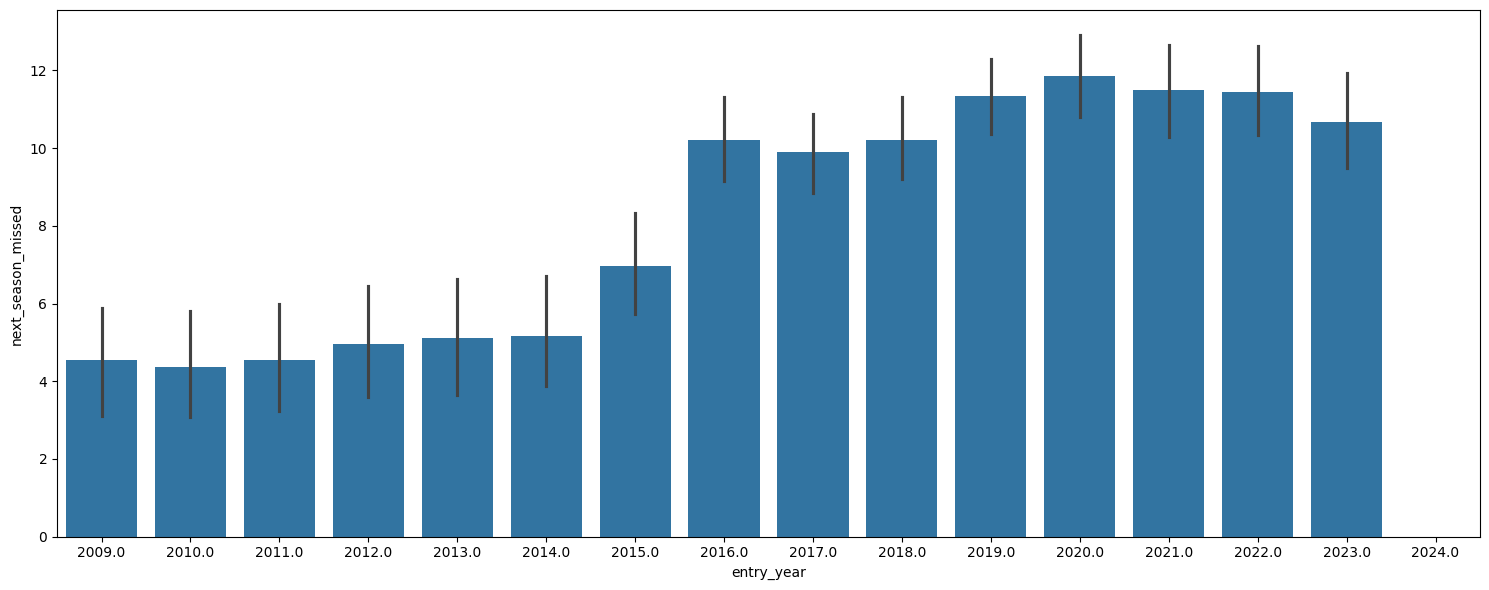

In [17]:
plt.figure(figsize=(15,6))

rookies_missed_by_entry = sns.barplot(data=rookies, x='entry_year', y='next_season_missed', estimator = 'mean')
plt.tight_layout()
plt.show()

In [18]:
df['season_x'] = df['season_x'].astype(int)


In [19]:

df = df[df['season_x'] <= 2023]

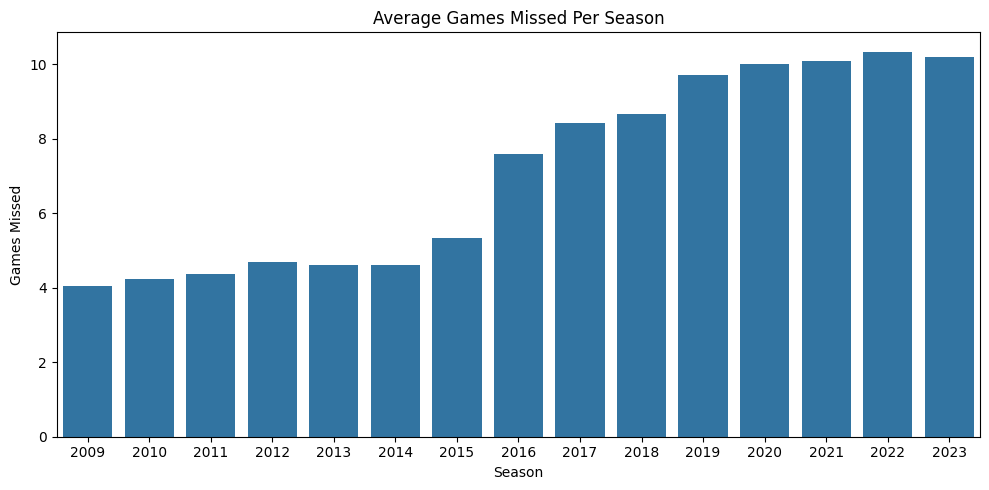

In [20]:
plt.figure(figsize=(10,5))

missed_by_season = sns.barplot(data=df, x='season_x', y='missed_games', estimator = 'mean', errorbar=None)
plt.xlabel('Season')
plt.ylabel('Games Missed')
plt.title('Average Games Missed Per Season')
plt.tight_layout()
plt.show()

In [21]:
df.groupby('season_x')['missed_games'].mean()

season_x
2009     4.055215
2010     4.236641
2011     4.371601
2012     4.687688
2013     4.602699
2014     4.614568
2015     5.334815
2016     7.592998
2017     8.427984
2018     8.667692
2019     9.696266
2020    10.009606
2021    10.078109
2022    10.334673
2023    10.177019
Name: missed_games, dtype: float64

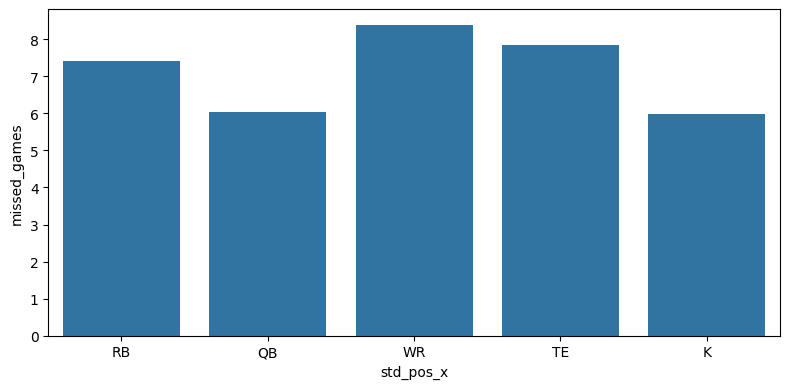

In [22]:
plt.figure(figsize=(8,4))

missed_by_season = sns.barplot(data=df, x='std_pos_x', y='missed_games', estimator = 'mean', errorbar=None)


plt.tight_layout()
plt.show()

In [23]:
df['weight'].describe()

count    12463.000000
mean       218.304341
std         24.224712
min        150.000000
25%        200.000000
50%        215.000000
75%        235.000000
max        311.000000
Name: weight, dtype: float64

In [24]:
df[df['weight'] == 0]

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed


In [25]:
# Fill missing weight numbers for EDA

df.loc[df['unique_id'] == '00-0039914_2024_Praise_Olatoke_WR', 'weight'] = 197
df.loc[df['unique_id'] == '00-0039651_2024_Sam_Schnee_RB', 'weight'] = 195
df.loc[df['unique_id'] == '00-0039581_2024_Trent_Pennix_RB', 'weight'] = 234

In [26]:
df[df['weight'] == 0]

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed


<Axes: >

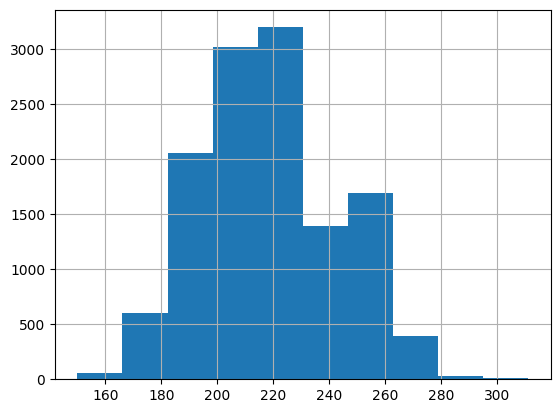

In [27]:
df['weight'].hist()

In [28]:
df['weight'].describe()

count    12463.000000
mean       218.304341
std         24.224712
min        150.000000
25%        200.000000
50%        215.000000
75%        235.000000
max        311.000000
Name: weight, dtype: float64

In [31]:
df['ppr_sh'].describe()

count    12463.000000
mean         0.054050
std          0.062678
min         -0.315193
25%          0.000000
50%          0.031646
75%          0.090502
max          0.343776
Name: ppr_sh, dtype: float64

In [33]:
# Binned values look better on a chart for binary variables, make bins and add columns

ppr_bins = [-.4, -.2, -.1, 0, .1, .2, .3, .7]
ppr_labels = ["Below -10%", '-20% to -10%','-10% to 0','0 to 10%', '10% to 20%', '20% to 30%', 'Above 30%']

# Add column to dataset

df['ppr_sh_bons'] = pd.cut(df['ppr_sh'], bins=ppr_bins, labels=ppr_labels, right=True)
df.head()

,season_x,team_x,status,height,weight,player_id_x,years_exp,game_type_x,entry_year,age,cleaned_name_x,std_pos_x,unique_id,active_games,max_week,missed_games,birth_year,tgt_sh,ay_sh,yac_sh,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,yptmpa,ppr_sh,completions_summed,attempts_summed,passing_yards_summed,passing_tds_summed,interceptions_summed,sacks_summed,sack_yards_summed,sack_fumbles_summed,sack_fumbles_lost_summed,passing_air_yards_summed,passing_first_downs_summed,passing_2pt_conversions_summed,carries_summed,rushing_yards_summed,rushing_tds_summed,rushing_fumbles_summed,rushing_fumbles_lost_summed,rushing_first_downs_summed,rushing_2pt_conversions_summed,receptions_summed,targets_summed,receiving_yards_summed,receiving_tds_summed,receiving_fumbles_summed,receiving_fumbles_lost_summed,receiving_air_yards_summed,receiving_yards_after_catch_summed,receiving_first_downs_summed,receiving_2pt_conversions_summed,special_teams_tds_summed,report_primary_injury,report_status,practice_primary_injury,practice_status,doubt,out,prob,quest,fp,dnp,lp,Hamstring,Knee,Ankle,Groin,Neck,Concussion,Foot,Back,Achilles,next_season_missed,weight_bins,ppr_sh_bons
13270,2023,SEA,ACT,73.0,220.0,00-0039165,0.0,REG,2023.0,22.0,Zach Charbonnet,RB,00-0039165_2023_Zach_Charbonnet_RB,16.0,18.0,2.0,2001.0,0.072595,-0.010534,0.125506,0.052938,0.0,0.039326,0.035176,0.37931,0.080979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0,462.0,1.0,0.0,0.0,32.0,0.0,33.0,40.0,209.0,0.0,0.0,0.0,-41.0,248.0,7.0,0.0,0.0,Knee,Questionable,Knee,Full Participation in Practice,0.0,0.0,0.0,2.0,2.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,206-220,0 to 10%
13268,2023,IND,RES,76.0,232.0,00-0039164,0.0,REG,2023.0,21.0,Anthony Richardson,QB,00-0039164_2023_Anthony_Richardson_QB,4.0,18.0,14.0,2002.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.213689,50.0,84.0,577.0,3.0,1.0,7.0,29.0,1.0,0.0,676.0,31.0,2.0,25.0,136.0,4.0,2.0,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Concussion,Active,Concussion,Full Participation in Practice,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,221-235,20% to 30%
13266,2023,HOU,ACT,75.0,218.0,00-0039163,0.0,DIV,2023.0,22.0,C.J. Stroud,QB,00-0039163_2023_C.J._Stroud_QB,17.0,20.0,3.0,2001.0,0.001779,-0.000201,0.000491,0.000000,0.0,0.000000,0.000000,0.00000,0.206308,354.0,553.0,4557.0,26.0,5.0,38.0,331.0,6.0,3.0,4908.0,206.0,0.0,43.0,167.0,3.0,2.0,1.0,17.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0,0.0,Concussion,Active,Concussion,Full Participation in Practice,1.0,0.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,206-220,20% to 30%
13264,2023,TEN,INA,76.0,232.0,00-0039152,0.0,REG,2023.0,24.0,Will Levis,QB,00-0039152_2023_Will_Levis_QB,9.0,18.0,9.0,1999.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.159821,149.0,255.0,1808.0,8.0,4.0,28.0,185.0,5.0,2.0,2688.0,81.0,1.0,25.0,57.0,1.0,2.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Foot,Questionable,Foot,Limited Participation in Practice,0.0,0.0,0.0,2.0,8.0,0.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,3.0,0.0,0.0,4.0,221-235,10% to 20%
13262,2023,CAR,ACT,70.0,194.0,00-0039150,0.0,REG,2023.0,22.0,Bryce Young,QB,00-0039150_2023_Bryce_Young_QB,16.0,18.0,2.0,2001.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.154486,315.0,527.0,2877.0,11.0,10.0,62.0,477.0,9.0,6.0,4009.0,133.0,1.0,39.0,253.0,0.0,2.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Back,Active,Back,Full Participation in Practice,0.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,191-205,10% to 20%


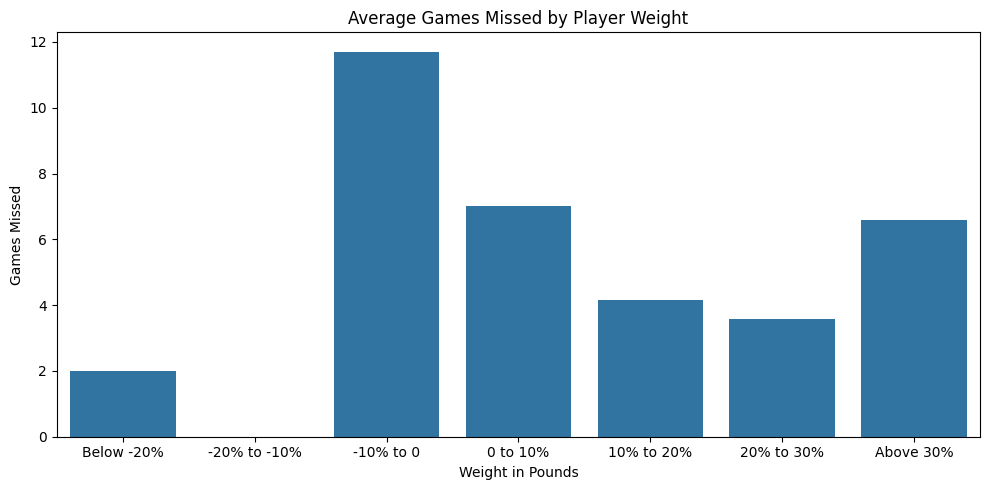

In [36]:
plt.figure(figsize=(10,5))

missed_by_weight = sns.barplot(data=df, x='ppr_sh_bons', y='next_season_missed', estimator = 'mean', errorbar=None)
plt.xlabel('Weight in Pounds')
plt.ylabel('Games Missed')
plt.title('Average Games Missed by Player Weight')
plt.tight_layout()
plt.show()

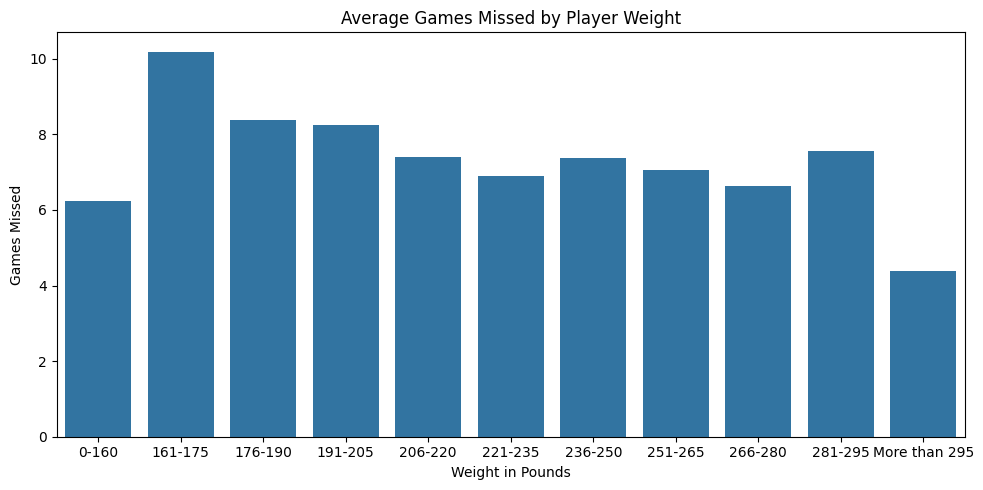

In [30]:
plt.figure(figsize=(10,5))

missed_by_weight = sns.barplot(data=df, x='weight_bins', y='missed_games', estimator = 'mean', errorbar=None)
plt.xlabel('Weight in Pounds')
plt.ylabel('Games Missed')
plt.title('Average Games Missed by Player Weight')
plt.tight_layout()
plt.show()

In [ ]:
# Binned values look better on a chart for binary variables, make bins and add columns

weight_bins = [0, 160, 175, 190, 205, 220, 235, 250, 265, 280, 295, 600]
weight_labels = ['0-160', '161-175','176-190','191-205', '206-220', '221-235', '236-250', '251-265', '266-280', '281-295', 'More than 295']

# Add column to dataset

df['weight_bins'] = pd.cut(df['weight'], bins=weight_bins, labels=weight_labels, right=True)
df.head()